In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from io import StringIO


In [129]:
pwd

'C:\\Users\\KARTHICK RAJA\\Desktop\\DAB24W\\Capstone project'

In [130]:
df_retail = pd.read_excel("Retail_data.xlsx")

In [131]:
df_retail

,Date,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
0,2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071
1,2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071
2,2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071
3,2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071
4,2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087
...,...,...,...,...,...,...,...
283,2023-08-01,1.121,1.060,3.869,3.477,0.204,0.182
284,2023-09-01,1.144,1.060,3.804,3.396,0.202,0.177
285,2023-10-01,1.159,1.060,3.563,3.170,0.195,0.179
286,2023-11-01,1.169,1.060,3.403,2.888,0.143,0.178


In [132]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  288 non-null    datetime64[ns]
 1   utility_Michigan      288 non-null    float64       
 2   Utility_Texas         288 non-null    float64       
 3   Gasoloine_Michigan    288 non-null    float64       
 4   Gasoline_Texas        288 non-null    float64       
 5   Electricity_michigan  288 non-null    float64       
 6   Electricity_texas     288 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.9 KB


In [133]:
df_retail.head()

,Date,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
0,2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071
1,2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071
2,2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071
3,2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071
4,2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087


In [134]:
df_retail.tail()

,Date,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
283,2023-08-01,1.121,1.06,3.869,3.477,0.204,0.182
284,2023-09-01,1.144,1.06,3.804,3.396,0.202,0.177
285,2023-10-01,1.159,1.06,3.563,3.170,0.195,0.179
286,2023-11-01,1.169,1.06,3.403,2.888,0.143,0.178
287,2023-12-01,1.166,1.06,3.131,2.708,0.143,0.178


In [135]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  288 non-null    datetime64[ns]
 1   utility_Michigan      288 non-null    float64       
 2   Utility_Texas         288 non-null    float64       
 3   Gasoloine_Michigan    288 non-null    float64       
 4   Gasoline_Texas        288 non-null    float64       
 5   Electricity_michigan  288 non-null    float64       
 6   Electricity_texas     288 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.9 KB


In [136]:
rt = df_retail[['Date', 'Utility_Texas']]
print(rt)

          Date  Utility_Texas
0   2000-01-01          0.571
1   2000-02-01          0.571
2   2000-03-01          0.604
3   2000-04-01          0.604
4   2000-05-01          0.604
..         ...            ...
283 2023-08-01          1.060
284 2023-09-01          1.060
285 2023-10-01          1.060
286 2023-11-01          1.060
287 2023-12-01          1.060

[288 rows x 2 columns]


In [137]:
rt.set_index('Date',inplace=True)
rt.head()

,Utility_Texas
Date,
2000-01-01,0.571
2000-02-01,0.571
2000-03-01,0.604
2000-04-01,0.604
2000-05-01,0.604


<AxesSubplot: xlabel='Date'>

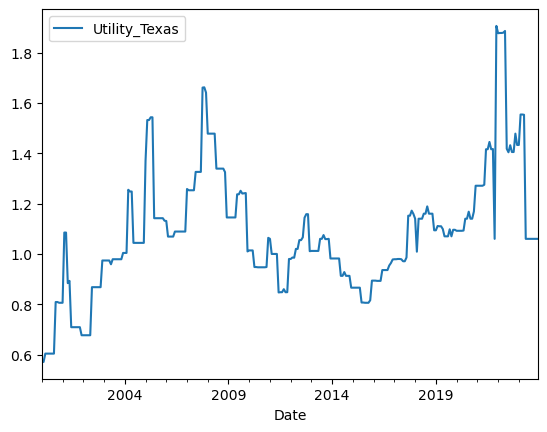

In [138]:
rt.plot()

# Dicky-Fuller-Test

In [139]:
from statsmodels.tsa.stattools import adfuller

In [140]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [141]:
adf_test(rt['Utility_Texas'])

ADF Statistics: -3.6845600682563346
p-value: 0.00433564724788383
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [142]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

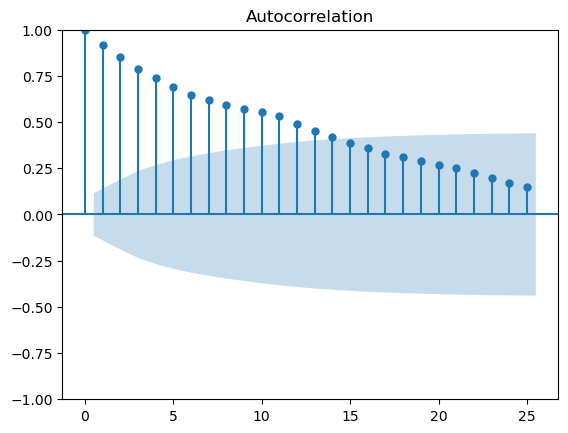

In [143]:
acf = plot_acf(rt["Utility_Texas"].dropna())

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


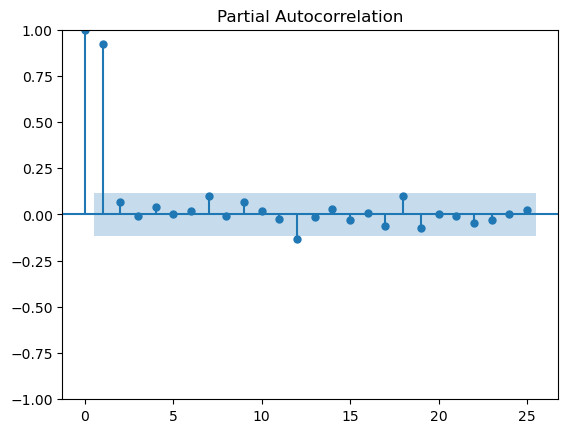

In [144]:
acf = plot_pacf(rt["Utility_Texas"].dropna())

In [145]:
df_retail.set_index('Date',inplace=True)
df_retail.head()

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
Date,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087


In [146]:
### split train and test data
df_retail

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
Date,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087
...,...,...,...,...,...,...
2023-08-01,1.121,1.060,3.869,3.477,0.204,0.182
2023-09-01,1.144,1.060,3.804,3.396,0.202,0.177
2023-10-01,1.159,1.060,3.563,3.170,0.195,0.179


In [147]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2008,1,1)
test_dataset_end=datetime(2023,1,1)

In [148]:
train_data=df_retail[:train_dataset_end]
test_data=df_retail[train_dataset_end+timedelta(days=1):test_dataset_end]

In [149]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [150]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
Date,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161
...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182


In [151]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [152]:
train_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
Date,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087
...,...,...,...,...,...,...
2007-09-01,1.083,1.326,3.050,2.662,0.111,0.149
2007-10-01,1.051,1.661,2.955,2.665,0.111,0.149
2007-11-01,1.054,1.662,3.207,2.937,0.111,0.134


In [153]:
from statsmodels.tsa.arima.model import ARIMA


In [154]:
model_ARIMA=ARIMA(train_data['Utility_Texas'],order=(0,2,0))

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [155]:
model_Arima_fit=model_ARIMA.fit()

In [156]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Utility_Texas   No. Observations:                   97
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  61.787
Date:                Wed, 17 Apr 2024   AIC                           -121.573
Time:                        17:28:05   BIC                           -119.019
Sample:                    01-01-2000   HQIC                          -120.541
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0159      0.002     10.117      0.000       0.013       0.019
===================================================================================
Ljung-Box (L1) (Q):                  19.18   Jarque-Bera (JB):                21.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.16
Prob(H) (two-sided):                  0.39   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas
Date,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161
...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182


In [158]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2008-02-01 00:00:00
2023-01-01 00:00:00


In [159]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Utility_Texas']-pred

In [160]:
pred

2008-02-01     1.315
2008-03-01     1.152
2008-04-01     0.989
2008-05-01     0.826
2008-06-01     0.663
               ...  
2022-09-01   -27.210
2022-10-01   -27.373
2022-11-01   -27.536
2022-12-01   -27.699
2023-01-01   -27.862
Freq: MS, Name: predicted_mean, Length: 180, dtype: float64

In [161]:
residuals

Date
2008-02-01     0.163
2008-03-01     0.326
2008-04-01     0.489
2008-05-01     0.652
2008-06-01     0.676
               ...  
2022-09-01    28.615
2022-10-01    28.778
2022-11-01    29.014
2022-12-01    29.132
2023-01-01    29.295
Length: 180, dtype: float64

<AxesSubplot: ylabel='Density'>

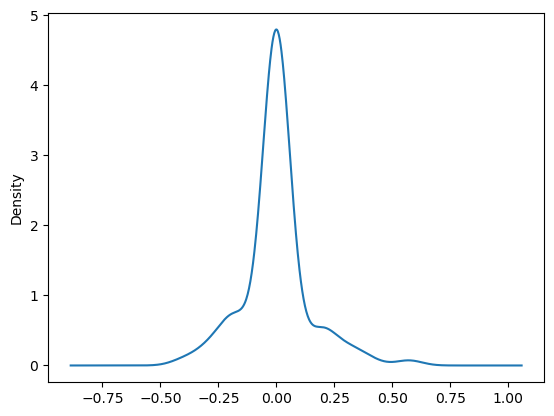

In [162]:
model_Arima_fit.resid.plot(kind='kde')

In [163]:
test_data['Predicted_ARIMA']=pred

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: xlabel='Date'>

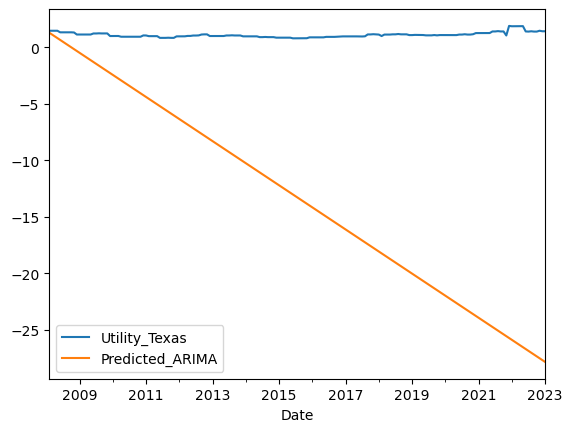

In [164]:
test_data[['Utility_Texas','Predicted_ARIMA']].plot()

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


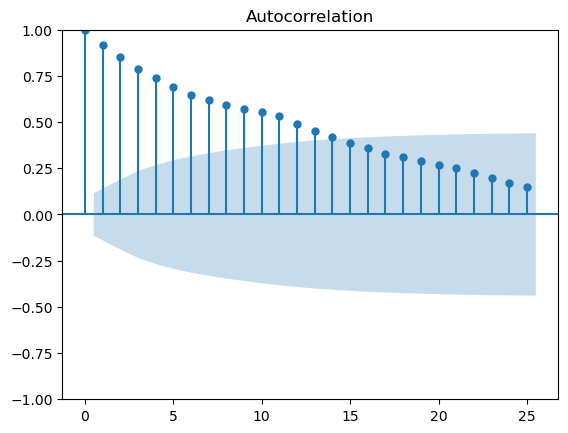

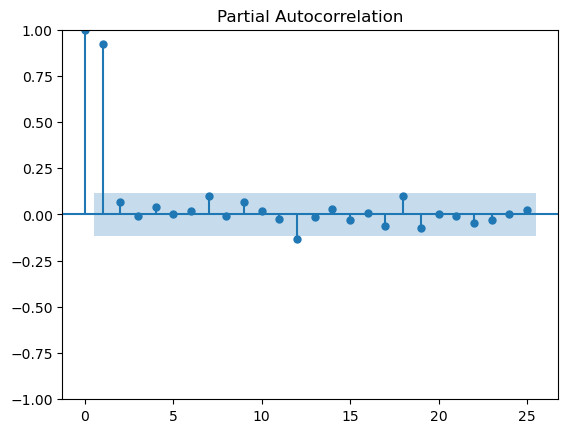

In [165]:
acf12 = plot_acf(df_retail["Utility_Texas"].dropna())
pacf12 = plot_pacf(df_retail["Utility_Texas"].dropna())

In [166]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [167]:
model_SARIMA=SARIMAX(train_data['Utility_Texas'],order=(2,0,15),seasonal_order=(0,1,0,12))

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [168]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [169]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        Utility_Texas   No. Observations:                   97
Model:             SARIMAX(2, 0, 15)x(0, 1, [], 12)   Log Likelihood                  71.629
Date:                              Wed, 17 Apr 2024   AIC                           -107.259
Time:                                      17:28:07   BIC                            -63.291
Sample:                                  01-01-2000   HQIC                           -89.574
                                       - 01-01-2008                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7276      1.704      0.427      0.669      -2.612       4.068
ar.L2          0.0497      1.614      0.031      0.975      -3.114       3.213
ma.L1          0.2784      5.561      0.050      0.960     -10.620      11.177
ma.L2          0.1024      3.968      0.026      0.979      -7.674       7.879
ma.L3          0.0638      2.113      0.030      0.976      -4.079       4.206
ma.L4          0.2043      4.437      0.046      0.963      -8.492       8.900
ma.L5          0.0707      3.735      0.019      0.985      -7.250       7.391
ma.L6          0.2078      7.429      0.028      0.978     -14.353      14.769
ma.L7         -0.0384      4.529     -0.008      0.993      -8.916       8.839
ma.L8          0.1436      4.898      0.029      0.977      -9.456       9.744
ma.L9          0.1286      2.494      0.052      0.959      -4.759       5.016
ma.L10         0.2103      3.513      0.060      0.952      -6.676       7.096
ma.L11         0.0260      3.842      0.007      0.995      -7.504       7.556
ma.L12        -0.7191      4.438     -0.162      0.871      -9.417       7.979
ma.L13        -0.3354      2.736     -0.123      0.902      -5.699       5.028
ma.L14         0.1389      1.415      0.098      0.922      -2.634       2.912
ma.L15        -0.1777      1.248     -0.142      0.887      -2.624       2.269
sigma2         0.0085      0.051      0.166      0.868      -0.092       0.109
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                17.23
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.72
Prob(H) (two-sided):                  0.95   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
test_data.tail()

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,Predicted_ARIMA
Date,,,,,,,
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,-27.210
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,-27.373
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-27.536
2022-12-01,0.886,1.433,3.180,2.753,0.182,0.190,-27.699
2023-01-01,1.334,1.433,3.429,2.987,0.182,0.181,-27.862


In [171]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2008-02-01 00:00:00
2023-01-01 00:00:00


In [172]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2008,6,6),end=datetime(2023,12,1))
residuals=test_data['Utility_Texas']-pred_Sarima

<AxesSubplot: xlabel='Date'>

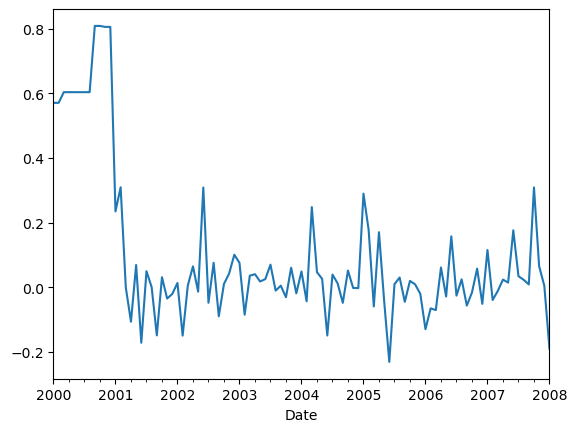

In [173]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

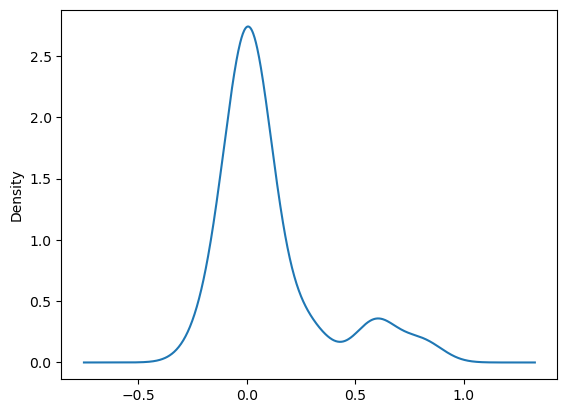

In [174]:
model_SARIMA_fit.resid.plot(kind='kde')

In [175]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [176]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,Predicted_ARIMA,Predicted_SARIMA
Date,,,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133,1.315,NaN
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133,1.152,NaN
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135,0.989,NaN
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136,0.826,NaN
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161,0.663,NaN
...,...,...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,-27.210,1.303998
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,-27.373,1.420728
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-27.536,1.310168


<AxesSubplot: xlabel='Date'>

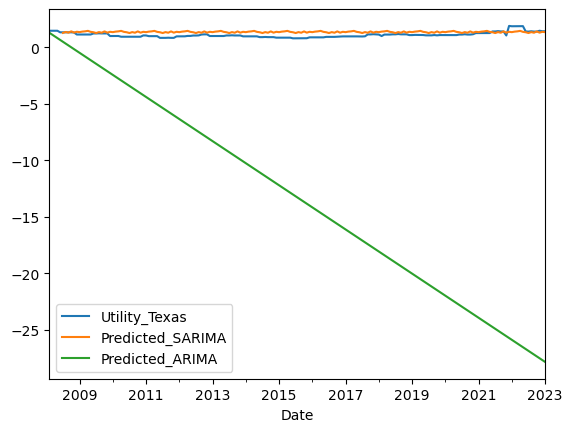

In [177]:
test_data[['Utility_Texas','Predicted_SARIMA','Predicted_ARIMA']].plot()

# Utility Michigan

In [185]:
df_retail = pd.read_excel("Retail_data.xlsx")
print(df_retail)

          Date  utility_Michigan  Utility_Texas  Gasoloine_Michigan  \
0   2000-01-01             0.520          0.571               1.374   
1   2000-02-01             0.520          0.571               1.453   
2   2000-03-01             0.521          0.604               1.592   
3   2000-04-01             0.521          0.604               1.429   
4   2000-05-01             0.520          0.604               1.492   
..         ...               ...            ...                 ...   
283 2023-08-01             1.121          1.060               3.869   
284 2023-09-01             1.144          1.060               3.804   
285 2023-10-01             1.159          1.060               3.563   
286 2023-11-01             1.169          1.060               3.403   
287 2023-12-01             1.166          1.060               3.131   

     Gasoline_Texas  Electricity_michigan  Electricity_texas  
0             1.296                 0.097              0.071  
1             1.363  

In [186]:
rt = df_retail[['Date', 'utility_Michigan']]
print(rt)

          Date  utility_Michigan
0   2000-01-01             0.520
1   2000-02-01             0.520
2   2000-03-01             0.521
3   2000-04-01             0.521
4   2000-05-01             0.520
..         ...               ...
283 2023-08-01             1.121
284 2023-09-01             1.144
285 2023-10-01             1.159
286 2023-11-01             1.169
287 2023-12-01             1.166

[288 rows x 2 columns]


In [187]:
rt.set_index('Date',inplace=True)
rt.head()

,utility_Michigan
Date,
2000-01-01,0.520
2000-02-01,0.520
2000-03-01,0.521
2000-04-01,0.521
2000-05-01,0.520


<AxesSubplot: xlabel='Date'>

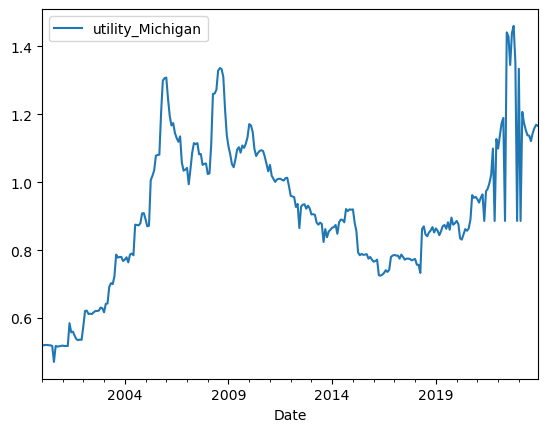

In [188]:
rt.plot()

In [189]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [190]:
adf_test(rt['utility_Michigan'])

ADF Statistics: -1.8770691816332556
p-value: 0.34292417775133593
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [193]:
## Use Techniques Differencing
rt['utility Michigan First Difference']=rt['utility_Michigan']-rt['utility_Michigan'].shift(1)

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\2798450749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['utility Michigan First Difference']=rt['utility_Michigan']-rt['utility_Michigan'].shift(1)


In [194]:
rt.head()

,utility_Michigan,utility Michigan First Difference
Date,,
2000-01-01,0.520,NaN
2000-02-01,0.520,0.000
2000-03-01,0.521,0.001
2000-04-01,0.521,0.000
2000-05-01,0.520,-0.001


In [195]:
adf_test(rt['utility Michigan First Difference'].dropna())

ADF Statistics: -4.4480282635394675
p-value: 0.0002438269861372585
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [196]:
## Use Techniques Differencing
rt['utility Michigan 12 Difference']=rt['utility_Michigan']-rt['utility_Michigan'].shift(12)

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\2895132161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['utility Michigan 12 Difference']=rt['utility_Michigan']-rt['utility_Michigan'].shift(12)


In [197]:
adf_test(rt['utility Michigan 12 Difference'].dropna())

ADF Statistics: -3.213022452652461
p-value: 0.01924315512894116
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

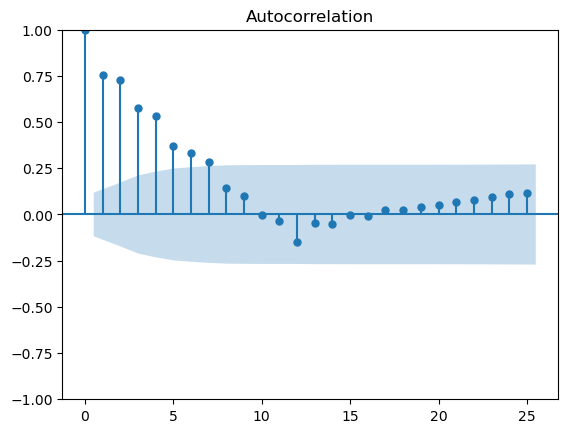

In [198]:
acf = plot_acf(rt["utility Michigan 12 Difference"].dropna())

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


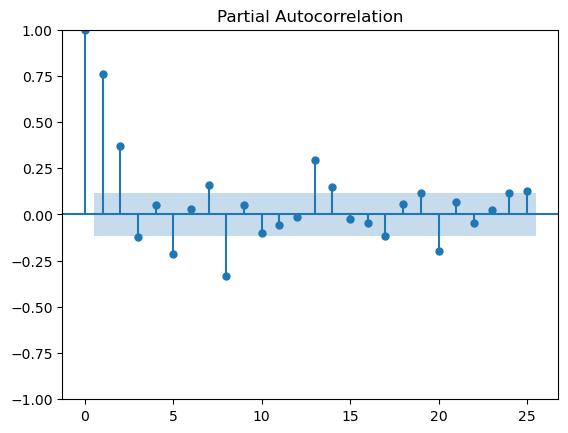

In [199]:
acf = plot_pacf(rt["utility Michigan 12 Difference"].dropna())

In [201]:
df_retail.set_index('Date',inplace=True)
df_retail.head()

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference
Date,,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071,NaN
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071,0.000
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071,0.001
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071,0.000
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087,-0.001


In [202]:
### split train and test data
df_retail

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference
Date,,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071,NaN
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071,0.000
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071,0.001
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071,0.000
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087,-0.001
...,...,...,...,...,...,...,...
2023-08-01,1.121,1.060,3.869,3.477,0.204,0.182,-0.016
2023-09-01,1.144,1.060,3.804,3.396,0.202,0.177,0.023
2023-10-01,1.159,1.060,3.563,3.170,0.195,0.179,0.015


In [203]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2008,1,1)
test_dataset_end=datetime(2023,1,1)

In [204]:
train_data=df_retail[:train_dataset_end]
test_data=df_retail[train_dataset_end+timedelta(days=1):test_dataset_end]

In [205]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [206]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference
Date,,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133,0.002
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133,0.085
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135,0.149
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136,0.001
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161,0.011
...,...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,0.094
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,0.021
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-0.108


In [208]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [207]:
train_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference
Date,,,,,,,
2000-01-01,0.520,0.571,1.374,1.296,0.097,0.071,NaN
2000-02-01,0.520,0.571,1.453,1.363,0.097,0.071,0.000
2000-03-01,0.521,0.604,1.592,1.524,0.097,0.071,0.001
2000-04-01,0.521,0.604,1.429,1.507,0.097,0.071,0.000
2000-05-01,0.520,0.604,1.492,1.488,0.097,0.087,-0.001
...,...,...,...,...,...,...,...
2007-09-01,1.083,1.326,3.050,2.662,0.111,0.149,0.001
2007-10-01,1.051,1.661,2.955,2.665,0.111,0.149,-0.032
2007-11-01,1.054,1.662,3.207,2.937,0.111,0.134,0.003


In [209]:
from statsmodels.tsa.arima.model import ARIMA

In [210]:
model_ARIMA=ARIMA(train_data['utility_Michigan'],order=(0,2,0))

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [211]:
model_Arima_fit=model_ARIMA.fit()

In [212]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       utility_Michigan   No. Observations:                   97
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 167.094
Date:                Wed, 17 Apr 2024   AIC                           -332.188
Time:                        17:41:17   BIC                           -329.634
Sample:                    01-01-2000   HQIC                          -331.156
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017      0.000      9.549      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  15.60   Jarque-Bera (JB):                14.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.22
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference
Date,,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133,0.002
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133,0.085
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135,0.149
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136,0.001
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161,0.011
...,...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,0.094
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,0.021
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-0.108


In [214]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2008-02-01 00:00:00
2023-01-01 00:00:00


In [215]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['utility_Michigan']-pred

In [216]:
pred

2008-02-01    0.993
2008-03-01    0.962
2008-04-01    0.931
2008-05-01    0.900
2008-06-01    0.869
              ...  
2022-09-01   -4.432
2022-10-01   -4.463
2022-11-01   -4.494
2022-12-01   -4.525
2023-01-01   -4.556
Freq: MS, Name: predicted_mean, Length: 180, dtype: float64

In [217]:
residuals

Date
2008-02-01    0.033
2008-03-01    0.149
2008-04-01    0.329
2008-05-01    0.361
2008-06-01    0.403
              ...  
2022-09-01    5.871
2022-10-01    5.923
2022-11-01    5.846
2022-12-01    5.411
2023-01-01    5.890
Length: 180, dtype: float64

<AxesSubplot: ylabel='Density'>

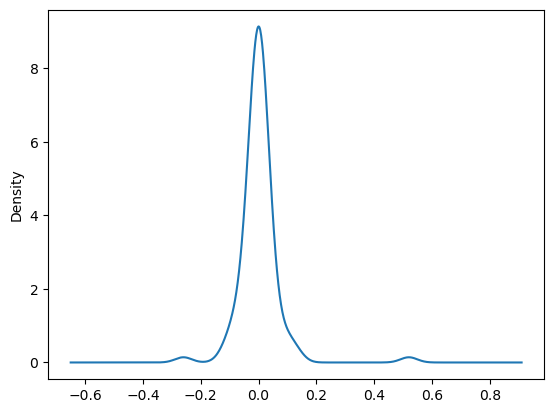

In [218]:
model_Arima_fit.resid.plot(kind='kde')

In [219]:
test_data['Predicted_ARIMA']=pred

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: xlabel='Date'>

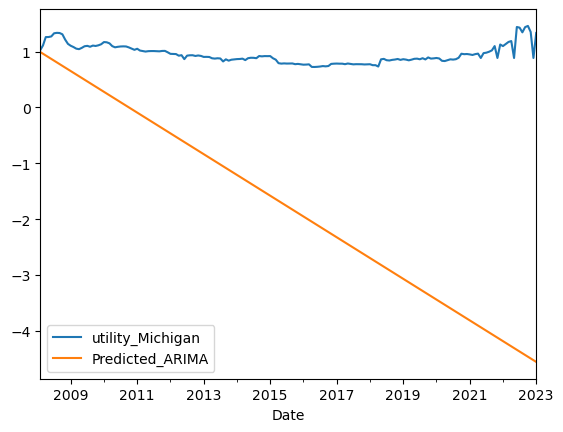

In [220]:
test_data[['utility_Michigan','Predicted_ARIMA']].plot()

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


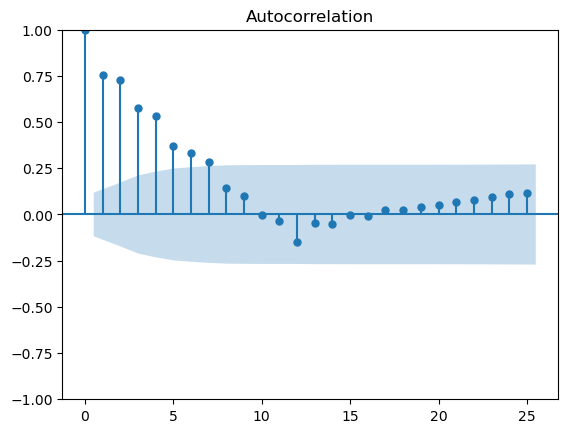

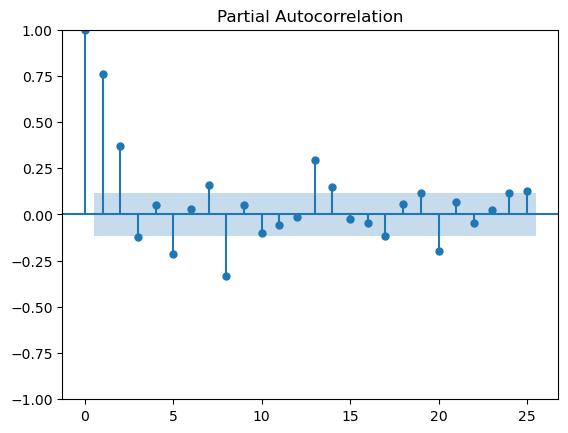

In [222]:
acf = plot_acf(rt["utility Michigan 12 Difference"].dropna())
pacf = plot_pacf(rt["utility Michigan 12 Difference"].dropna())

In [223]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [224]:
model_SARIMA=SARIMAX(train_data['utility_Michigan'],order=(12,0,8),seasonal_order=(0,1,0,12))

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [225]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KARTHICK RAJA\anaconda3\envs\DAB200\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [226]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     utility_Michigan   No. Observations:                   97
Model:             SARIMAX(12, 0, 8)x(0, 1, [], 12)   Log Likelihood                 159.997
Date:                              Wed, 17 Apr 2024   AIC                           -277.994
Time:                                      17:49:23   BIC                           -226.698
Sample:                                  01-01-2000   HQIC                          -257.361
                                       - 01-01-2008                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7948      0.565      3.179      0.001       0.688       2.901
ar.L2         -1.1467      1.315     -0.872      0.383      -3.724       1.431
ar.L3         -0.2842      1.464     -0.194      0.846      -3.153       2.585
ar.L4          1.2386      1.062      1.166      0.244      -0.844       3.321
ar.L5         -1.1875      0.916     -1.296      0.195      -2.983       0.608
ar.L6          0.4537      0.928      0.489      0.625      -1.366       2.273
ar.L7          0.5462      0.858      0.636      0.524      -1.136       2.228
ar.L8         -1.2829      0.611     -2.099      0.036      -2.481      -0.085
ar.L9          1.2986      0.447      2.906      0.004       0.423       2.174
ar.L10        -0.6073      0.917     -0.662      0.508      -2.404       1.190
ar.L11        -0.1621      0.917     -0.177      0.860      -1.960       1.636
ar.L12         0.2378      0.387      0.615      0.538      -0.520       0.995
ma.L1         -0.6483      0.560     -1.158      0.247      -1.746       0.449
ma.L2          0.2149      0.779      0.276      0.783      -1.312       1.742
ma.L3          0.7354      0.633      1.161      0.245      -0.506       1.976
ma.L4         -0.4397      0.570     -0.771      0.441      -1.558       0.678
ma.L5          0.2228      0.478      0.466      0.641      -0.714       1.160
ma.L6          0.5942      0.341      1.743      0.081      -0.074       1.262
ma.L7         -0.4456      0.417     -1.068      0.286      -1.263       0.372
ma.L8          0.4995      0.347      1.438      0.150      -0.181       1.180
sigma2         0.0012      0.000      4.472      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.92   Prob(JB):                         0.20
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
test_data.tail()

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference,Predicted_ARIMA
Date,,,,,,,,
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,0.094,-4.432
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,0.021,-4.463
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-0.108,-4.494
2022-12-01,0.886,1.433,3.180,2.753,0.182,0.190,-0.466,-4.525
2023-01-01,1.334,1.433,3.429,2.987,0.182,0.181,0.448,-4.556


In [228]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2008-02-01 00:00:00
2023-01-01 00:00:00


In [229]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2008,6,6),end=datetime(2023,12,1))
residuals=test_data['utility_Michigan']-pred_Sarima

<AxesSubplot: xlabel='Date'>

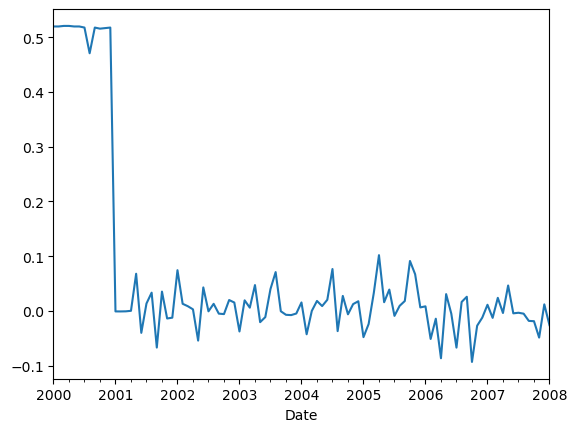

In [230]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

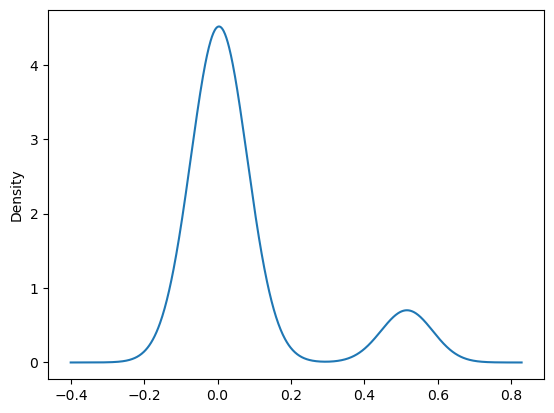

In [231]:
model_SARIMA_fit.resid.plot(kind='kde')

In [232]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\KARTHICK RAJA\AppData\Local\Temp\ipykernel_27840\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [233]:
test_data

,utility_Michigan,Utility_Texas,Gasoloine_Michigan,Gasoline_Texas,Electricity_michigan,Electricity_texas,utility Michigan First Difference,Predicted_ARIMA,Predicted_SARIMA
Date,,,,,,,,,
2008-02-01,1.026,1.478,3.125,2.983,0.111,0.133,0.002,0.993,NaN
2008-03-01,1.111,1.478,3.336,3.206,0.111,0.133,0.085,0.962,NaN
2008-04-01,1.260,1.478,3.582,3.406,0.112,0.135,0.149,0.931,NaN
2008-05-01,1.261,1.478,4.005,3.689,0.105,0.136,0.001,0.900,NaN
2008-06-01,1.272,1.339,4.112,3.951,0.115,0.161,0.011,0.869,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-01,1.439,1.405,4.035,3.169,0.188,0.241,0.094,-4.432,0.957879
2022-10-01,1.460,1.405,4.147,3.222,0.180,0.207,0.021,-4.463,0.943156
2022-11-01,1.352,1.478,3.865,3.104,0.180,0.182,-0.108,-4.494,0.948097


<AxesSubplot: xlabel='Date'>

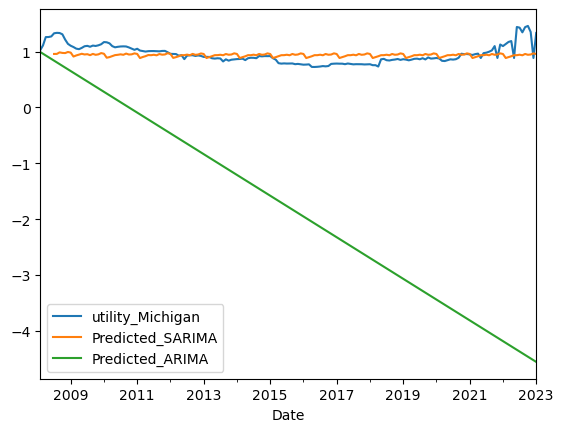

In [234]:
test_data[['utility_Michigan','Predicted_SARIMA','Predicted_ARIMA']].plot()